In [1]:
import numpy as np
import matplotlib.pyplot as plt
from core import GPMarginalLogLikelihood
from kernels import SquaredExponentialKernel

In [2]:
dataFilenamePattern = "../ch2/results/dataFig2_5_l%.2f_sf%.2f_sn%.2f.npz"


In [3]:
nSamplePointsPerAxis=50
trueL = 1
trueSf = 1
trueSn = .1
snStart = -2.5
snStop = 0.5
lStart = -1.0
lStop = 1.0
nLevels = 30
tooSmallThr = -60
annotateColor = "red"
xlabel = "characteristic lengthscale"
ylabel = "noise standard deviation"

In [4]:
nSnPoints = nSamplePointsPerAxis
nLPoints = nSamplePointsPerAxis
dataFilename = dataFilenamePattern%(trueL, trueSf, trueSn)
loadRes = np.load(file=dataFilename)
x = loadRes["x"]
y = loadRes["y"]

In [5]:
sns = np.logspace(start=snStart, stop=snStop, num=nSnPoints)
ls = np.logspace(start=lStart, stop=lStop, num=nLPoints)
mls = np.empty(shape=(len(sns), len(ls)))
mls[:] = np.nan
kernel = SquaredExponentialKernel()
ml = GPMarginalLogLikelihood(x=x, y=y, kernel=kernel)
sf = trueSf

In [7]:
for i in range(len(sns)):
    sn = sns[i]
    for j in range(len(ls)):
        l = ls[j]
        params = np.array([l, sf, sn])
        mls[i, j] = ml.eval(params=params)
tooSmallIndices = np.where(mls<tooSmallThr)
mls[tooSmallIndices] = tooSmallThr


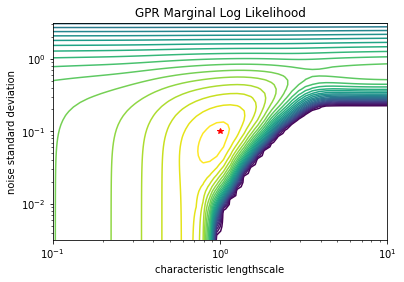

In [10]:
x = ls
y = sns
[X, Y] = np.meshgrid(x, y)
Z = mls
cp = plt.contour(X, Y, Z, nLevels)
plt.plot([trueL], [trueSn], marker='*', color='red')
plt.title("GPR Marginal Log Likelihood")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()